In [1]:
!git clone https://github.com/Gokulapps/Pytorch-Model-Training-Base-Repo

Cloning into 'Pytorch-Model-Training-Base-Repo'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 29 (delta 10), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (29/29), 11.38 KiB | 1.14 MiB/s, done.


In [2]:
!pip install git+https://github.com/jacobgil/pytorch-grad-cam.git

  Cloning https://github.com/jacobgil/pytorch-grad-cam.git to /tmp/pip-req-build-s6pyyocz
  Running command git clone --filter=blob:none --quiet https://github.com/jacobgil/pytorch-grad-cam.git /tmp/pip-req-build-s6pyyocz
  Resolved https://github.com/jacobgil/pytorch-grad-cam.git to commit 2183a9cbc1bd5fc1d8e134b4f3318c3b6db5671f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.4.6-py3-none-any.whl size=37422 sha256=248211817a8dcf97aea2838d75ff4a20a2380e71752225dcd572c71b5ae4e567
  Stored in directory: /tmp/pip-ephem-wheel-cache-gfauo3hi/wheels/1a/48/ce/f524b2c1a029317827d9c3c74798a9e6b8d34f904ce57d886a
Successfully built grad-cam


In [3]:
%cd /kaggle/working/Pytorch-Model-Training-Base-Repo/

/kaggle/working/Pytorch-Model-Training-Base-Repo


In [4]:
%matplotlib inline
import torch 
import torchvision 
import torch.nn as nn 
import torch.nn.functional as F
import torch.optim as optim 
import torch.autograd as grad
import matplotlib.pyplot as plt
import numpy as np
import argparse
import warnings
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from models.resnet import ResNet18 
from utils import *
from torch.optim.lr_scheduler import StepLR
from torchvision import datasets, transforms
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
warnings.filterwarnings("ignore")

=> Parallelizing Training across Multiple GPU's


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Model Training...
EPOCH: 1


Loss=0.9354263544082642 Batch_id=781 Accuracy=44.98: 100%|██████████| 782/782 [00:46<00:00, 16.80it/s]



Test set: Average loss: 0.0191, Accuracy: 5603/10000 (56.03%)

EPOCH: 2


Loss=0.7139893174171448 Batch_id=781 Accuracy=60.46: 100%|██████████| 782/782 [00:40<00:00, 19.49it/s]



Test set: Average loss: 0.0148, Accuracy: 6687/10000 (66.87%)

EPOCH: 3


Loss=0.9373383522033691 Batch_id=781 Accuracy=67.38: 100%|██████████| 782/782 [00:40<00:00, 19.49it/s]



Test set: Average loss: 0.0125, Accuracy: 7222/10000 (72.22%)

EPOCH: 4


Loss=1.124898910522461 Batch_id=781 Accuracy=72.62: 100%|██████████| 782/782 [00:40<00:00, 19.39it/s]  



Test set: Average loss: 0.0105, Accuracy: 7676/10000 (76.76%)

EPOCH: 5


Loss=0.9116421341896057 Batch_id=781 Accuracy=75.55: 100%|██████████| 782/782 [00:40<00:00, 19.44it/s] 



Test set: Average loss: 0.0100, Accuracy: 7797/10000 (77.97%)

EPOCH: 6


Loss=0.5467715859413147 Batch_id=781 Accuracy=80.89: 100%|██████████| 782/782 [00:40<00:00, 19.42it/s] 



Test set: Average loss: 0.0084, Accuracy: 8157/10000 (81.57%)

EPOCH: 7


Loss=0.6789627075195312 Batch_id=781 Accuracy=82.07: 100%|██████████| 782/782 [00:40<00:00, 19.40it/s] 



Test set: Average loss: 0.0081, Accuracy: 8220/10000 (82.20%)

EPOCH: 8


Loss=0.64139324426651 Batch_id=781 Accuracy=82.71: 100%|██████████| 782/782 [00:40<00:00, 19.42it/s]   



Test set: Average loss: 0.0081, Accuracy: 8235/10000 (82.35%)

EPOCH: 9


Loss=0.6356114149093628 Batch_id=781 Accuracy=83.13: 100%|██████████| 782/782 [00:40<00:00, 19.46it/s] 



Test set: Average loss: 0.0080, Accuracy: 8252/10000 (82.52%)

EPOCH: 10


Loss=0.1791631281375885 Batch_id=781 Accuracy=83.56: 100%|██████████| 782/782 [00:40<00:00, 19.42it/s] 



Test set: Average loss: 0.0079, Accuracy: 8287/10000 (82.87%)

EPOCH: 11


Loss=0.6784136891365051 Batch_id=781 Accuracy=84.47: 100%|██████████| 782/782 [00:40<00:00, 19.30it/s] 



Test set: Average loss: 0.0078, Accuracy: 8288/10000 (82.88%)

EPOCH: 12


Loss=0.6802496910095215 Batch_id=781 Accuracy=84.83: 100%|██████████| 782/782 [00:40<00:00, 19.43it/s] 



Test set: Average loss: 0.0077, Accuracy: 8298/10000 (82.98%)

EPOCH: 13


Loss=0.47012782096862793 Batch_id=781 Accuracy=84.91: 100%|██████████| 782/782 [00:40<00:00, 19.42it/s]



Test set: Average loss: 0.0077, Accuracy: 8331/10000 (83.31%)

EPOCH: 14


Loss=0.2579557001590729 Batch_id=781 Accuracy=84.90: 100%|██████████| 782/782 [00:40<00:00, 19.21it/s] 



Test set: Average loss: 0.0077, Accuracy: 8306/10000 (83.06%)

EPOCH: 15


Loss=0.529819905757904 Batch_id=781 Accuracy=84.98: 100%|██████████| 782/782 [00:40<00:00, 19.42it/s]  



Test set: Average loss: 0.0077, Accuracy: 8312/10000 (83.12%)

EPOCH: 16


Loss=0.3127591013908386 Batch_id=781 Accuracy=84.92: 100%|██████████| 782/782 [00:40<00:00, 19.37it/s] 



Test set: Average loss: 0.0077, Accuracy: 8320/10000 (83.20%)

EPOCH: 17


Loss=0.5213572382926941 Batch_id=781 Accuracy=84.84: 100%|██████████| 782/782 [00:40<00:00, 19.22it/s] 



Test set: Average loss: 0.0077, Accuracy: 8308/10000 (83.08%)

EPOCH: 18


Loss=0.9405627846717834 Batch_id=781 Accuracy=84.96: 100%|██████████| 782/782 [00:40<00:00, 19.37it/s] 



Test set: Average loss: 0.0077, Accuracy: 8310/10000 (83.10%)

EPOCH: 19


Loss=0.5804669260978699 Batch_id=781 Accuracy=85.05: 100%|██████████| 782/782 [00:40<00:00, 19.27it/s] 



Test set: Average loss: 0.0077, Accuracy: 8308/10000 (83.08%)

EPOCH: 20


Loss=0.4120886027812958 Batch_id=781 Accuracy=84.98: 100%|██████████| 782/782 [00:41<00:00, 18.90it/s] 



Test set: Average loss: 0.0077, Accuracy: 8314/10000 (83.14%)

Model Saved
Plotting Graphs


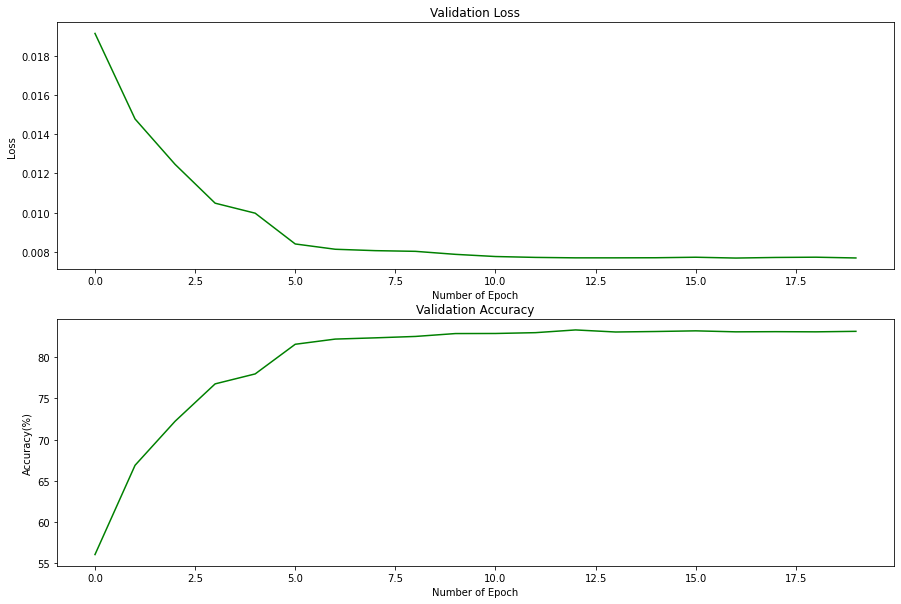

Displaying Sample Images from Dataset
Main File Completed!!!


In [5]:
%run main.py CIFAR10 20

In [6]:
model = torch.load('./checkpoint/model.pth')

In [7]:
test_dataset =  torchvision.datasets.CIFAR10(root='./data', train=False, download=True)
test_dataset_mean, test_dataset_std = get_mean_and_std(test_dataset, 3)
test_loader = DataLoader(AlbumentationDataset(test_dataset, test_dataset_mean, test_dataset_std, 32, train=False), batch_size=64, shuffle=True, num_workers=2, pin_memory = True) 
incorrect_predictions = misclassified_images(model, 'cuda', test_loader, 10)

Files already downloaded and verified


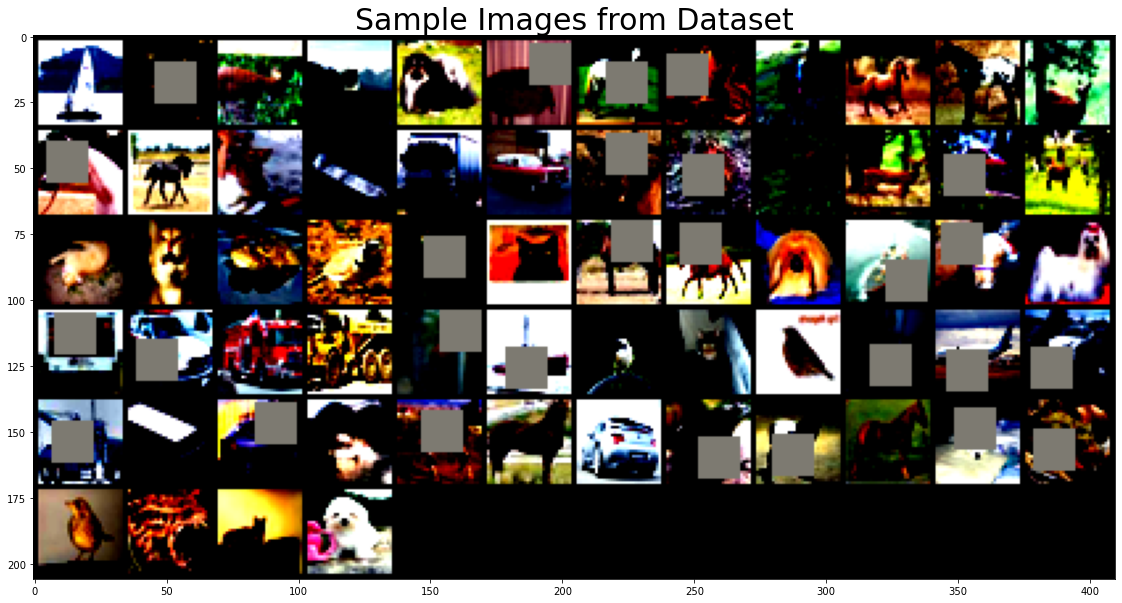

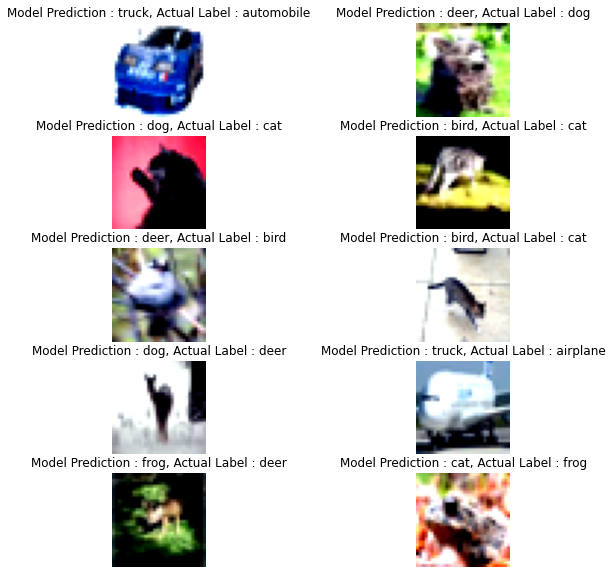

In [8]:
classes = test_dataset.classes
plot_misclassified_images(incorrect_predictions, classes, 5, 2, 10, fig_size=(10, 10))

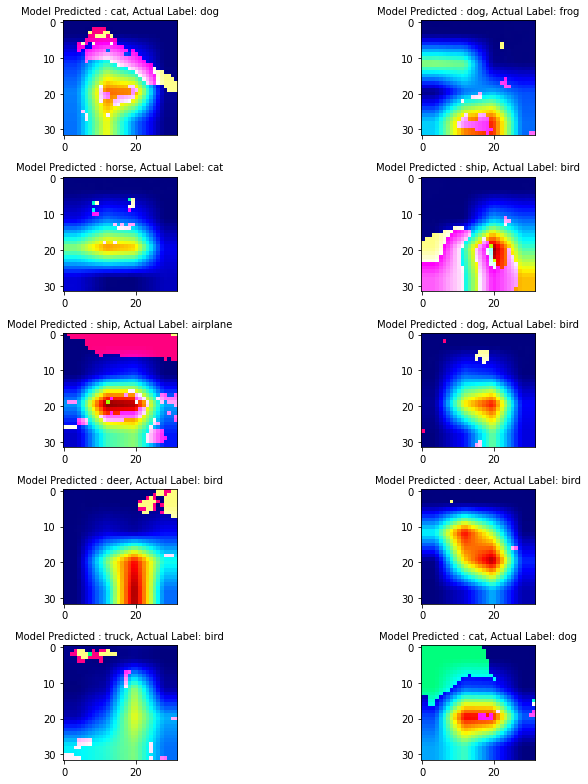

In [25]:
plt.figure(figsize=(11, 11))
for i in range(len(incorrect_predictions)):
  plt.subplot(5, 2, i+1)
  gradcam_image = Gradcam(model.module, incorrect_predictions[i][0].unsqueeze(dim=0), 'cuda', incorrect_predictions[i][2])
  plt.title(f"Model Predicted : {classes[incorrect_predictions[i][1]]}, Actual Label: {classes[incorrect_predictions[i][2]]}", fontsize=10)
  plt.imshow(gradcam_image.squeeze())
plt.tight_layout()